In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import wrangle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Notebook Formatting
pd.options.display.float_format = '{:20,.2f}'.format

># Bringing in Zillow data using `wrangle.py` module

In [2]:
# calling wrangle function to acquire zillow data
df = wrangle.wrangle_zillow()

df.head(2)

NumExpr defaulting to 8 threads.


,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.50,4.00,"3,100.00","6,059.00","33,634,931.00","-117,869,207.00","4,506.00","60,590,630.07","53,571.00",...,0.00,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",0.03,2017-01-01,Orange
1,17052889,1.00,2.00,"1,465.00","6,111.00","34,449,266.00","-119,281,531.00","12,647.00","61,110,010.02","13,091.00",...,5.00,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",0.06,2017-01-01,Ventura


>## Split data

In [3]:
# splitting data into train, validate and test
train, test = train_test_split(df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

print(f'Train: {train.shape[0]}')
print(f'Validate: {validate.shape[0]}')
print(f'Test: {test.shape[0]}')

Train: 41837
Validate: 13946
Test: 13946


>## 🟥Remove Outliers

Need help with multiple row removing and function

In [4]:
outlier_cols = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet',
                     'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 
                 'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate', 'county']

# creating a df with only columns that I want to remove outliers from 
df_outliers = train[outlier_cols]

df_outliers

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
56426,2.00,2.00,"1,402.00","7,313.00",0.00,"2,006.00","193,435.00","339,532.00","146,097.00","5,323.80",0.08,2017-07-12,Orange
41904,4.50,5.00,"3,405.00","10,712.00",10.00,"2,001.00","508,774.00","986,103.00","477,329.00","11,715.06",0.04,2017-05-31,Ventura
30983,3.00,2.00,"1,487.00","13,971.00",0.00,"2,002.00","212,000.00","684,000.00","472,000.00","8,174.77",-0.01,2017-04-28,Los_Angeles
36344,3.00,3.00,"1,275.00","59,445.00",0.00,"1,984.00","40,568.00","58,146.00","17,578.00",744.77,0.05,2017-05-15,Los_Angeles
44214,2.00,3.00,"1,726.00","8,732.00",0.00,"1,957.00","104,788.00","240,586.00","135,798.00","2,918.31",0.00,2017-06-07,Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26358,1.00,2.00,"1,312.00","7,573.00",0.00,"1,922.00","65,000.00","319,000.00","254,000.00","4,038.40",-0.08,2017-04-14,Los_Angeles
64806,1.00,3.00,"1,444.00","6,290.00",0.00,"1,939.00","119,085.00","595,430.00","476,345.00","7,157.43",0.01,2017-08-09,Los_Angeles
58155,6.00,5.00,"3,832.00","6,050.00",0.00,"2,014.00","807,123.00","2,329,998.00","1,522,875.00","27,989.92",0.02,2017-07-18,Los_Angeles
51100,2.00,2.00,"1,448.00","7,526.00",0.00,"1,939.00","161,681.00","549,737.00","388,056.00","6,414.41",-0.04,2017-06-27,Los_Angeles


# 1. 5 Qs 
>Keep in mind that your target variable is `logerror`. <i>e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?</i>

### Q1 | High Cost, High Error?
Do more expensive homes have higher log errors?

### Q2 | Errors Across Location
Does a home's location have any correlation with its log error?

### Q3 | Price Outliers Causing More Error?
Do homes that are closer to the average home price have lower log errors than those who's prices fall at either the higher or lower cost extremes?

### Q4 | Older Home, Less Reliable Predictions?
Do older homes have higher log errors?

### Q5 | Bed/Bath Mismatch, Higher Error?
Do homes with a difference of 2 or more in bedrooms and bathrooms have higher log errors than homes where bedroom and bathroom counts are the same?

In [6]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
56426,14660646,2.00,2.00,"1,402.00","6,059.00","33,692,187.00","-117,819,340.00","7,313.00","60,590,525.16","52,650.00",...,0.00,"2,006.00","193,435.00","339,532.00","2,016.00","146,097.00","5,323.80",0.08,2017-07-12,Orange
41904,17071648,4.50,5.00,"3,405.00","6,111.00","34,287,225.00","-119,214,856.00","10,712.00","61,110,017.00","34,543.00",...,10.00,"2,001.00","508,774.00","986,103.00","2,016.00","477,329.00","11,715.06",0.04,2017-05-31,Ventura
30983,10910843,3.00,2.00,"1,487.00","6,037.00","34,146,700.00","-118,394,000.00","13,971.00","60,371,436.02","12,447.00",...,0.00,"2,002.00","212,000.00","684,000.00","2,016.00","472,000.00","8,174.77",-0.01,2017-04-28,Los_Angeles
36344,10964764,3.00,3.00,"1,275.00","6,037.00","34,320,300.00","-118,448,000.00","59,445.00","60,371,064.05","12,447.00",...,0.00,"1,984.00","40,568.00","58,146.00","2,016.00","17,578.00",744.77,0.05,2017-05-15,Los_Angeles
44214,12945317,2.00,3.00,"1,726.00","6,037.00","34,052,461.00","-117,948,789.00","8,732.00","60,374,067.01","14,542.00",...,0.00,"1,957.00","104,788.00","240,586.00","2,016.00","135,798.00","2,918.31",0.00,2017-06-07,Los_Angeles


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41837 entries, 56426 to 62305
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      41837 non-null  int64  
 1   bathroomcnt                   41837 non-null  float64
 2   bedroomcnt                    41837 non-null  float64
 3   calculatedfinishedsquarefeet  41837 non-null  float64
 4   fips                          41837 non-null  float64
 5   latitude                      41837 non-null  float64
 6   longitude                     41837 non-null  float64
 7   lotsizesquarefeet             41837 non-null  float64
 8   rawcensustractandblock        41837 non-null  float64
 9   regionidcity                  41837 non-null  float64
 10  regionidcounty                41837 non-null  float64
 11  regionidzip                   41837 non-null  float64
 12  roomcnt                       41837 non-null  float64
 1

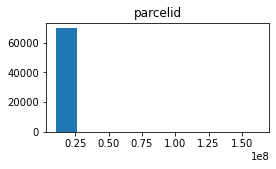

---------------------


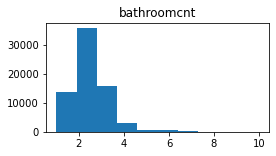

---------------------


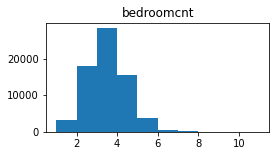

---------------------


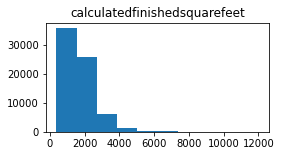

---------------------


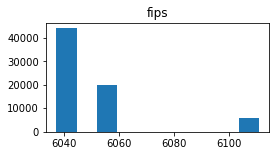

---------------------


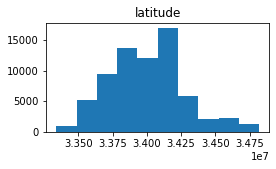

---------------------


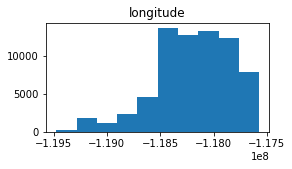

---------------------


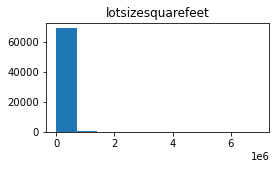

---------------------


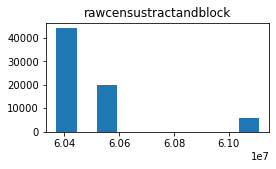

---------------------


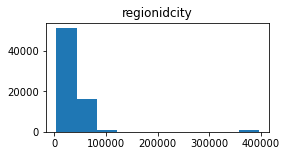

---------------------


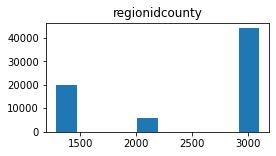

---------------------


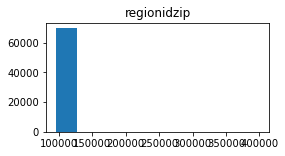

---------------------


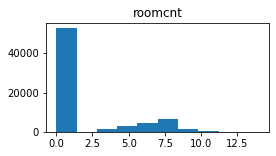

---------------------


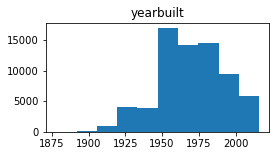

---------------------


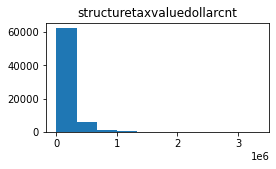

---------------------


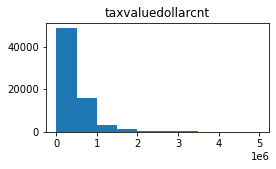

---------------------


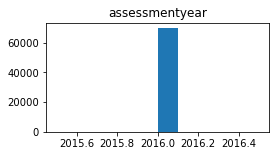

---------------------


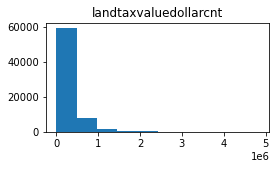

---------------------


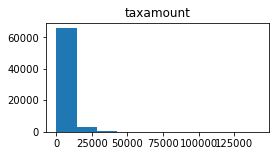

---------------------


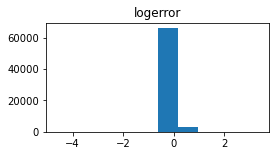

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


---------------------


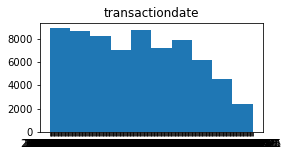

---------------------


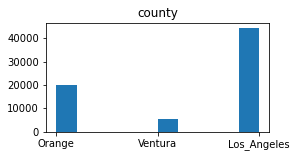

---------------------


In [8]:
# column histograms
for col in train.columns:
    plt.figure(figsize = (4, 2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    print('---------------------')

In [9]:
train.yearbuilt = train.yearbuilt.astype(int)

In [10]:
train.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'logerror', 'transactiondate', 'county'],
      dtype='object')

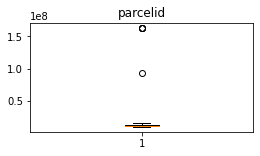

---------------------


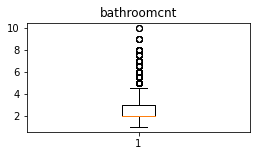

---------------------


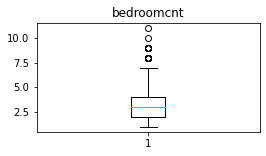

---------------------


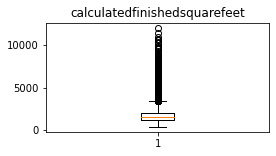

---------------------


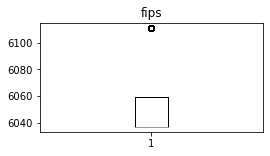

---------------------


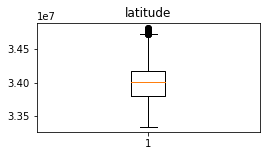

---------------------


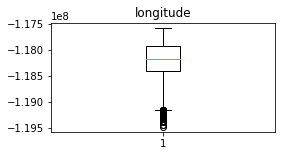

---------------------


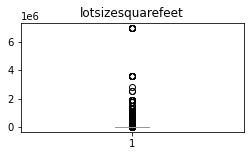

---------------------


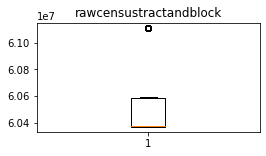

---------------------


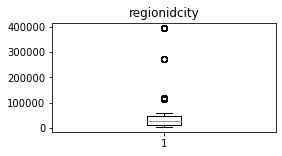

---------------------


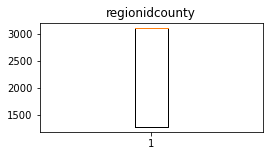

---------------------


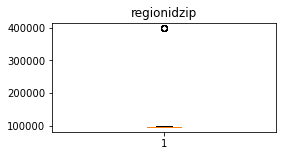

---------------------


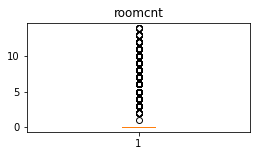

---------------------


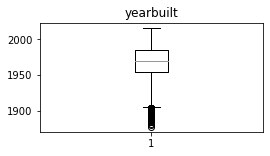

---------------------


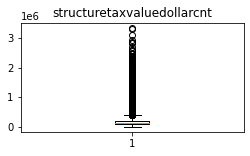

---------------------


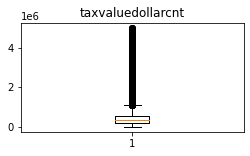

---------------------


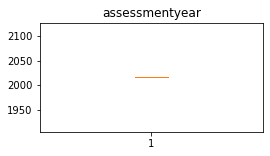

---------------------


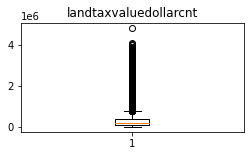

---------------------


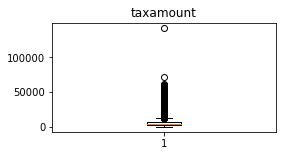

---------------------


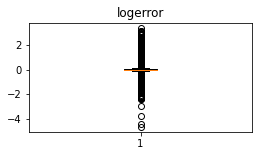

---------------------


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

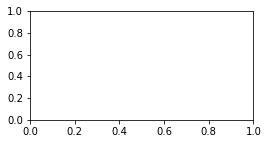

In [11]:
# column histograms
for col in train.columns:
    plt.figure(figsize = (4, 2))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()
    print('---------------------')

# 2. 5 As
>Answer those questions through a mix of statistical tests and visualizations.

### Q1
>Do more expensive homes have higher log errors?

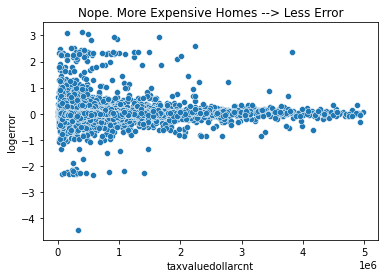

In [90]:
# looking at x = taxvaluedollarcnt and y = logerror (two continuous vars, both non-norm distr)
sns.scatterplot(x = 'taxvaluedollarcnt', y = 'logerror', data = train)
plt.title('Nope. More Expensive Homes --> Less Error')
plt.show()


### Q2
>Does a home's location have any correlation with its log error?

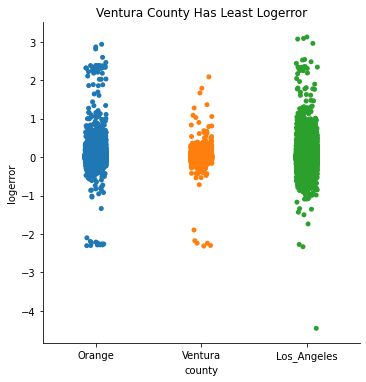

In [13]:
# looking at x = county, y = logerror (a categorical and continous column pairing)
sns.catplot(x = 'county', y = 'logerror', data = train)
plt.title('Ventura County Has Least Logerror')
plt.show()


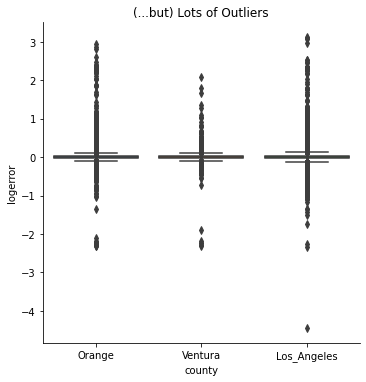

In [14]:
sns.catplot(x = 'county', y = 'logerror', data = train, kind = 'box')
plt.title('(...but) Lots of Outliers')
plt.show()

>### 🟥 Will come back and remove outliers and then look at this again

### Q3
>Do homes that are closer to the average home price have lower log errors than those who's prices fall at either the higher or lower cost extremes?

🟥 Will come back and try this with binned `taxvaluedollarcnt` column by quartiles

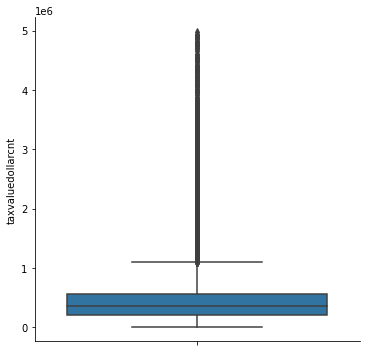

In [15]:
sns.catplot(y = 'taxvaluedollarcnt', data = train, kind = 'box')

In [30]:
q1 = train.taxvaluedollarcnt.quantile(0.25)
q3 = train.taxvaluedollarcnt.quantile(0.75)

print(f'Q1: {q1}\nQ3: {q3}')

Q1: 203548.0
Q3: 562772.0


In [31]:
iqr = q3 - q1

print(f'IQR: {iqr}')

IQR: 359224.0


In [32]:
df_outlier = train[(train.taxvaluedollarcnt < upper_bound) & (train.taxvaluedollarcnt > lower_bound)]

In [34]:
df_outlier.shape

(39123, 22)

In [35]:
train.shape

(41837, 22)

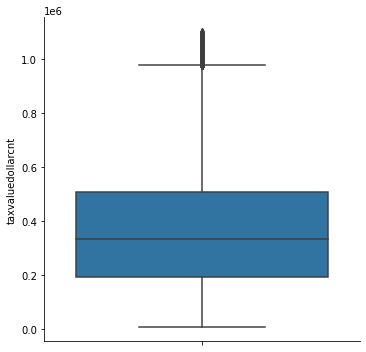

In [43]:
sns.catplot(y = 'taxvaluedollarcnt', data = df_outlier, kind = 'box')

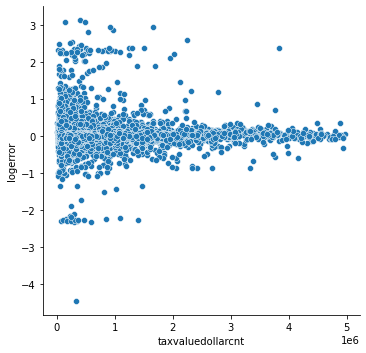

In [63]:
sns.relplot(x = 'taxvaluedollarcnt', y = 'logerror', data = train)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

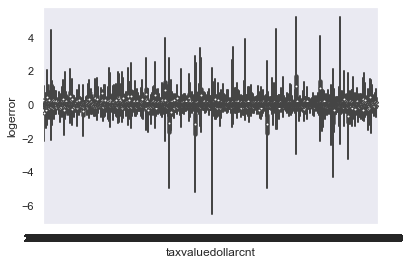

In [150]:
sns.violinplot(x = 'taxvaluedollarcnt', y = 'logerror', data = train)

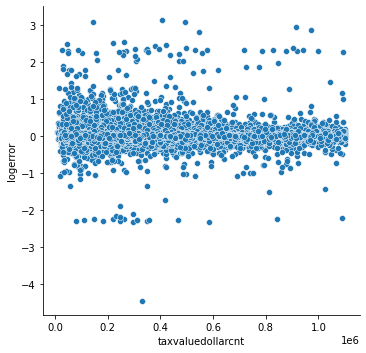

In [52]:
# x = taxvaluedollarcnt, y = logerror

sns.relplot(x = 'taxvaluedollarcnt', y = 'logerror', data = df_outlier)

### Q4
>Do older homes have higher log errors?

In [67]:
train.yearbuilt

56426    2006
41904    2001
30983    2002
36344    1984
44214    1957
         ... 
26358    1922
64806    1939
58155    2014
51100    1939
62305    1978
Name: yearbuilt, Length: 41837, dtype: int64

>##### Adding age column using today's year and `yearbuilt` column

In [78]:
from datetime import date

train['age'] = date.today().year - train.yearbuilt
train.head(2)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county,age
56426,14660646,2.00,2.00,"1,402.00","6,059.00","33,692,187.00","-117,819,340.00","7,313.00","60,590,525.16","52,650.00",...,2006,"193,435.00","339,532.00","2,016.00","146,097.00","5,323.80",0.08,2017-07-12,Orange,15
41904,17071648,4.50,5.00,"3,405.00","6,111.00","34,287,225.00","-119,214,856.00","10,712.00","61,110,017.00","34,543.00",...,2001,"508,774.00","986,103.00","2,016.00","477,329.00","11,715.06",0.04,2017-05-31,Ventura,20


<AxesSubplot:xlabel='age', ylabel='logerror'>

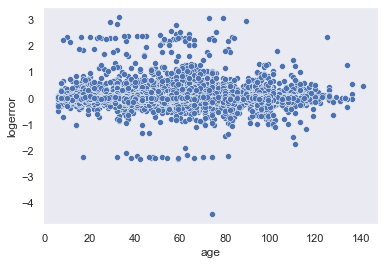

In [97]:
sns.scatterplot(x = 'age', y = 'logerror', data = train)

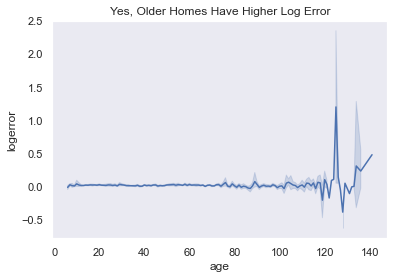

In [121]:
sns.lineplot(x = 'age', y = 'logerror', data = train)
plt.title('Yes, Older Homes Have Higher Log Error')
plt.show()

>## Follow up Question: Does this vary across counties?

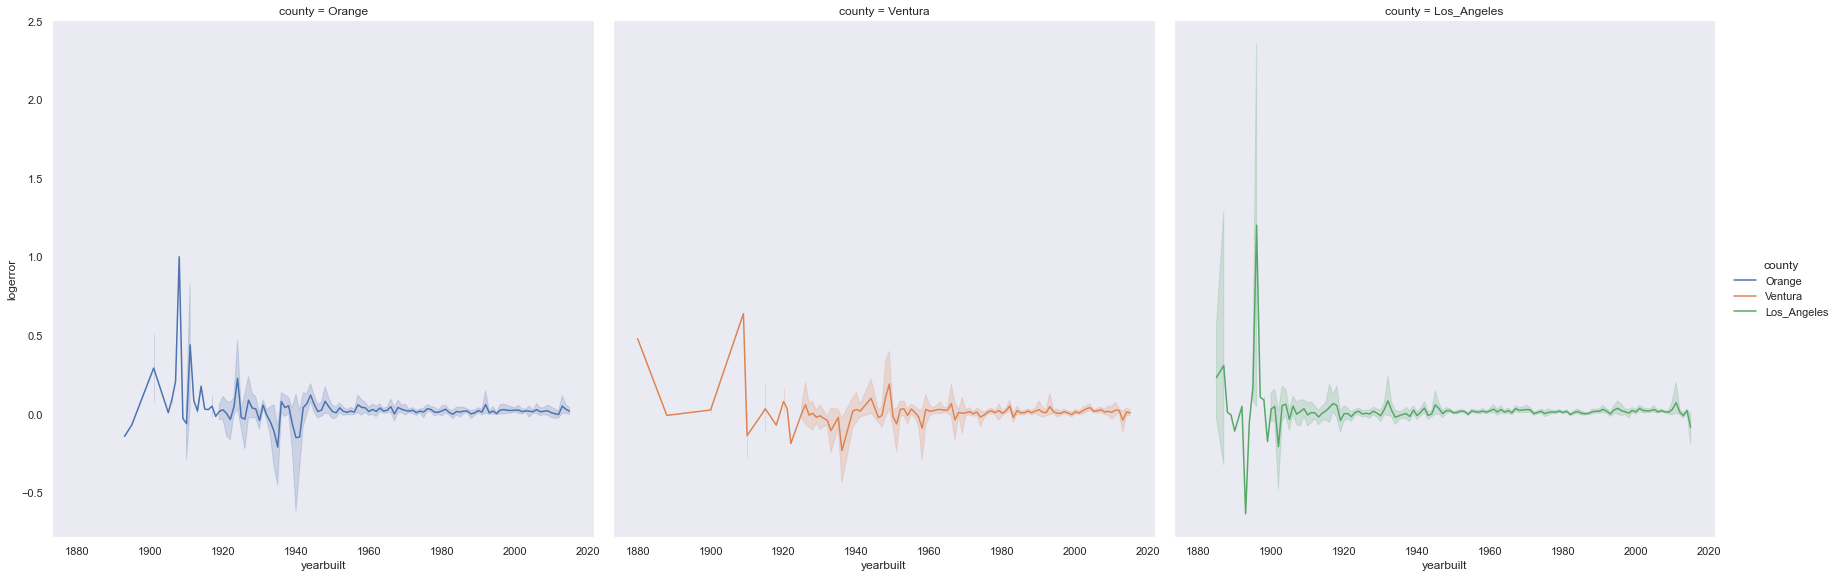

In [151]:
sns.relplot(x = 'yearbuilt', y = 'logerror', data = train, kind = 'line', hue = 'county', col = 'county', height = 8)

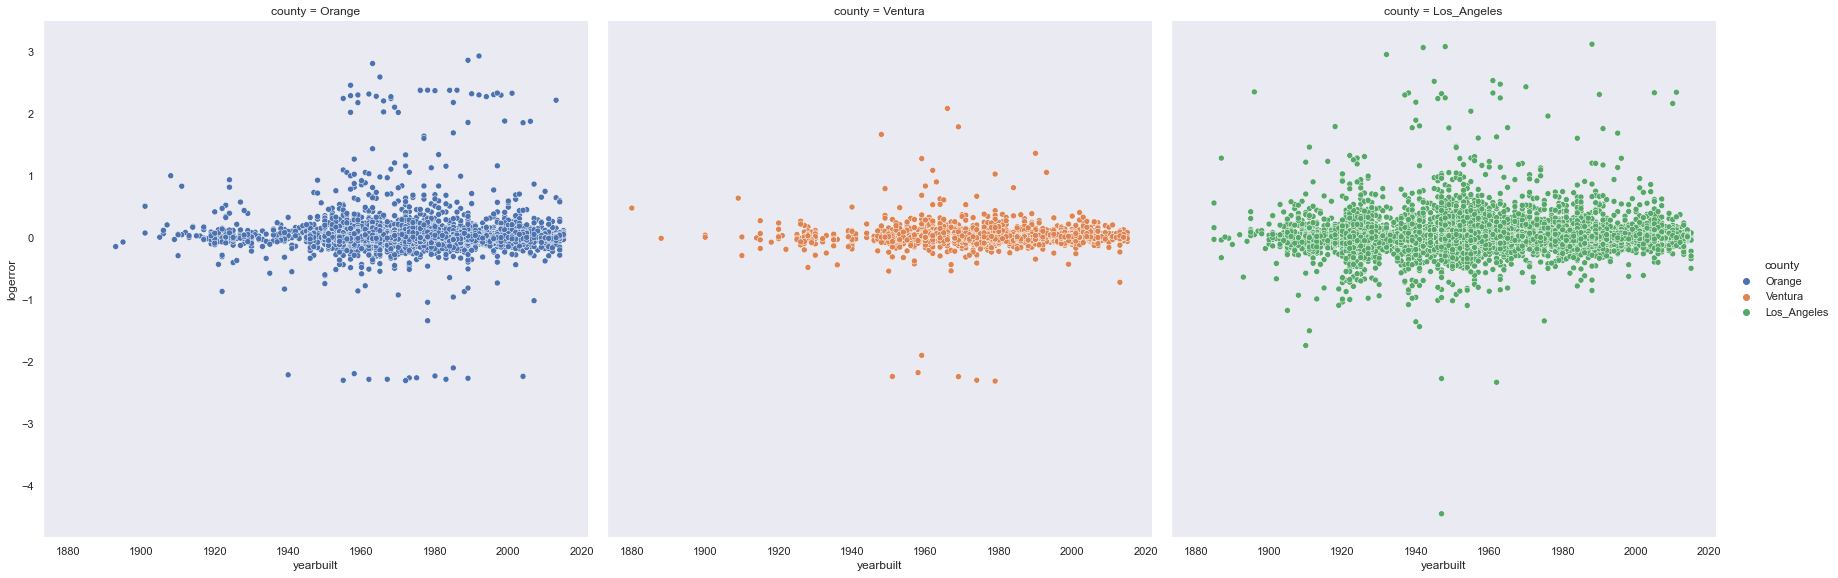

In [154]:
sns.relplot(x = 'yearbuilt', y = 'logerror', data = train, kind = 'scatter', hue = 'county', 
            col = 'county', height = 8)

### Q5
>Do homes with a difference of 2 or more in bedrooms and bathrooms have higher log errors than homes where bedroom and bathroom counts are the same?

In [125]:
equal = train[train.bedroomcnt == train.bathroomcnt]

In [126]:
not_equal = train[train.bedroomcnt != train.bathroomcnt]

In [129]:
# creating a new column that will show whether bed/bath count is equal
train['equal_bedbath'] = train.bedroomcnt == train.bathroomcnt

In [ ]:
train.head(2)

In [ ]:
sns.voilinplot(x='equal_bedbath', y='logerror', data=train)